# CL3

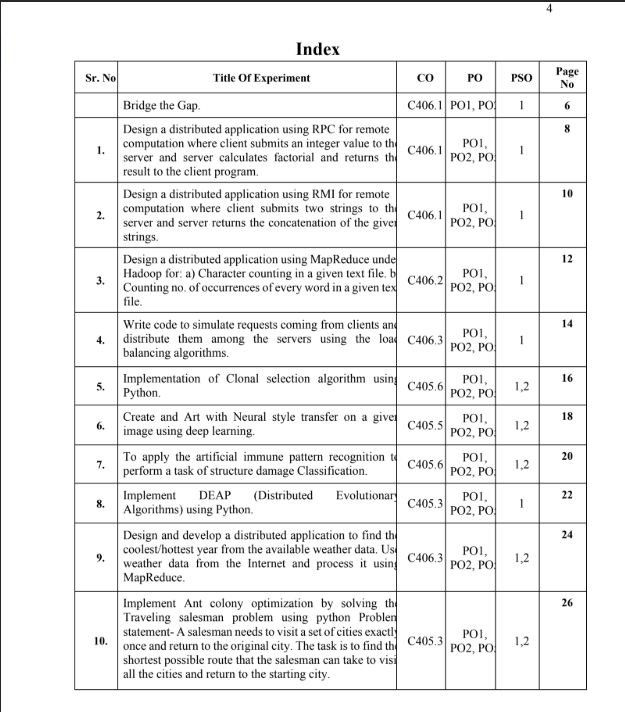

## P1

In [ ]:
# SERVER:
from xmlrpc.server import SimpleXMLRPCServer

class fact:
  def calc(n):
    if n < 0:
      raise ValueError("Greater than zero value expected...")
    result = 1
    for i in range(1,n+1):
      result *= i
    return result

with SimpleXMLRPCServer(('localhost',8000)) as server:
   server.register_instance(fact())
   print("Server Started")
   server.serve_forever()

Server Started


KeyboardInterrupt: 

In [ ]:
# Client:


from xmlrpc.client import ServerProxy

with ServerProxy('http://localhost:8000') as proxy:
  print(proxy.calc(input("Enter no.")))


Enter no.5


OSError: [Errno 99] Cannot assign requested address

## P2

In [ ]:
import Pyro4
#python -m Pyro4.naming

@Pyro4.expose
class StringConcatenationServer:
    def concatenate_strings(self, str1, str2):
        result = str1 + str2
        return result

def main():
    daemon = Pyro4.Daemon() # Create a Pyro daemon
    ns = Pyro4.locateNS() # Locate the Pyro nameserver
    # Create an instance of the server class
    server = StringConcatenationServer()
    # Register the server object with the Pyro nameserver
    uri = daemon.register(server)
    ns.register("string.concatenation", uri)
    print("Server URI:", uri)
    with open("server_uri.txt", "w") as f:
        f.write(str(uri))
    daemon.requestLoop()

if __name__ == "__main__":
    main()

In [ ]:
import Pyro4
##python -m Pyro4.naming

def main():
    with open("server_uri.txt","r") as f:
        uri = f.read()
        server = Pyro4.Proxy(uri) # Connect to the remote server
        str1 = input("Enter the first string:")
        str2 = input("Enter the second string: ")
        result = server.concatenate_strings(str1, str2)
        print("Concatenated Result:", result)


if __name__ == "__main__":
    main()

## P3

In [ ]:
from collections import Counter
from multiprocessing import Pool
import os

def map_char_count(chunk):
    print(chunk)
    print(Counter(chunk))
    return Counter(chunk)

def reduce_counts(counts):
    total = Counter()
    for count in counts:
        total.update(count)
    return total

def read_in_chunks(filename, chunk_size=100):
    with open(filename, 'r', encoding='utf-8') as f:
        while True:
            chunk = f.read(chunk_size)
            if not chunk:
                break
            yield chunk

def character_count(filename):
    print(os.cpu_count())
    with Pool(os.cpu_count()) as pool:
        chunks = list(read_in_chunks(filename))
        mapped = pool.map(map_char_count, chunks)
        print("MAPPED::::",mapped)
        result = reduce_counts(mapped)
    return result



def map_word_count(chunk):
    words = chunk.lower().split()
    print(words)
    return Counter(words)

def word_count(filename):
    with Pool(os.cpu_count()) as pool:
        chunks = list(read_in_chunks(filename))
        mapped = pool.map(map_word_count, chunks)
        result = reduce_counts(mapped)
    return result

# Example usage
#


# Example usage
print(character_count("/content/lorem.txt"))
print(word_count("/content/lorem.txt"))




2
 et dolore magna aliqua.
Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut 
Lorem ipsum dolor sit amet, consectetur adipiscing elit.
Sed do eiusmod tempor incididunt ut labore

Counter({' ': 13, 'i': 10, 'e': 9, 'o': 8, 't': 8, 'd': 7, 'r': 5, 'm': 5, 's': 5, 'u': 5, 'c': 4, 'n': 4, 'p': 3, 'l': 3, 'a': 3, '\n': 2, 'L': 1, ',': 1, 'g': 1, '.': 1, 'S': 1, 'b': 1})
Counter({' ': 16, 'i': 11, 'a': 9, 'n': 7, 'e': 6, 't': 6, 'o': 6, 'm': 6, 'l': 5, 'u': 5, 'r': 4, 's': 4, 'd': 3, 'q': 2, 'c': 2, 'g': 1, '.': 1, '\n': 1, 'U': 1, 'v': 1, ',': 1, 'x': 1, 'b': 1})aliquip ex ea commodo consequat.


Counter({' ': 4, 'o': 4, 'a': 3, 'e': 3, 'i': 2, 'q': 2, 'u': 2, 'c': 2, 'm': 2, 'l': 1, 'p': 1, 'x': 1, 'd': 1, 'n': 1, 's': 1, 't': 1, '.': 1, '\n': 1})
MAPPED:::: [Counter({' ': 13, 'i': 10, 'e': 9, 'o': 8, 't': 8, 'd': 7, 'r': 5, 'm': 5, 's': 5, 'u': 5, 'c': 4, 'n': 4, 'p': 3, 'l': 3, 'a': 3, '\n': 2, 'L': 1, ',': 1, 'g': 1, '.': 1, 'S': 1, 'b': 1}), Counter({' ': 16, '

In [ ]:
# lorem_writer.py

lorem_text = """
Lorem ipsum dolor sit amet, consectetur adipiscing elit.
Sed do eiusmod tempor incididunt ut labore et dolore magna aliqua.
Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat.
"""

# Open a file in write mode ('w'), which will create it if it doesn't exist
with open("lorem.txt", "w", encoding="utf-8") as file:
    file.write(lorem_text)

print("File 'lorem.txt' created and text written successfully.")


File 'lorem.txt' created and text written successfully.


## P4

In [ ]:
import random

class LoadBalancer:
    def __init__(self, servers):
        self.servers = servers
        self.server_index_rr = 0

    def round_robin(self):
        server = self.servers[self.server_index_rr]
        self.server_index_rr = (self.server_index_rr + 1) % len(self.servers)
        return server

    def random_selection(self):
        return random.choice(self.servers)

def simulate_client_requests(load_balancer, num_requests):
    for i in range(num_requests):
            # Simulating client request
            print(f"Request {i+1}: ", end="")

            # Using Round Robin algorithm for load balancing

            server_rr = load_balancer.round_robin()
            print(f"Round Robin - Server {server_rr}")

            # Using Random algorithm for load balancing
            server_random = load_balancer.random_selection()
            print(f"Random - Server {server_random}")

            print()

if __name__ == "__main__":
    # List of servers
    servers = ["Server A", "Server B", "Server C"]

    # Create a LoadBalancer instance
    load_balancer = LoadBalancer(servers)

    # Simulate 10 client requests
    simulate_client_requests(load_balancer, 10)

## P5

In [ ]:
import random

# Objective function: smaller is better
def fitness(x):
    return x * x

# Create initial population (random numbers)
def create_population(size, lower_bound, upper_bound):
    population = []
    for _ in range(size):
        individual = random.uniform(lower_bound, upper_bound)
        population.append(individual)
    return population

# Clone good individuals (more clones for better ones)
def clone_individuals(population, num_clones):
    clones = []
    for individual in population:
        for _ in range(num_clones):
            clones.append(individual)
    return clones

# Mutate the clones a little
def mutate(individual, mutation_rate, lower_bound, upper_bound):
    change = random.uniform(-mutation_rate, mutation_rate)
    new_value = individual + change
    # Keep it within bounds
    new_value = max(min(new_value, upper_bound), lower_bound)
    return new_value

# Main Clonal Selection Algorithm
def clonal_selection(generations=10, pop_size=5, clones_per_ind=3, mutation_rate=0.5):
    lower = -5
    upper = 5

    population = create_population(pop_size, lower, upper)

    for generation in range(generations):
        # Sort population by fitness (lower is better)
        population.sort(key=fitness)

        # Keep the best individuals (e.g., top 3)
        best = population[:3]

        # Clone and mutate
        clones = clone_individuals(best, clones_per_ind)
        mutated_clones = []
        for c in clones:
            mutated = mutate(c, mutation_rate, lower, upper)
            mutated_clones.append(mutated)

        # Combine original best with mutated clones
        population = best + mutated_clones

        # Keep only top pop_size individuals
        population.sort(key=fitness)
        population = population[:pop_size]

        print(f"Generation {generation+1}: Best = {population[0]:.4f}, Fitness = {fitness(population[0]):.4f}")

    return population[0]

# Run the algorithm
best_solution = clonal_selection()
print("\nBest solution found:", best_solution)


Generation 1: Best = -0.6709, Fitness = 0.4501
Generation 2: Best = -0.4335, Fitness = 0.1879
Generation 3: Best = -0.2137, Fitness = 0.0457
Generation 4: Best = -0.0043, Fitness = 0.0000
Generation 5: Best = -0.0043, Fitness = 0.0000
Generation 6: Best = -0.0043, Fitness = 0.0000
Generation 7: Best = -0.0043, Fitness = 0.0000
Generation 8: Best = -0.0043, Fitness = 0.0000
Generation 9: Best = -0.0043, Fitness = 0.0000
Generation 10: Best = -0.0043, Fitness = 0.0000

Best solution found: -0.0043378810952126035


## P6

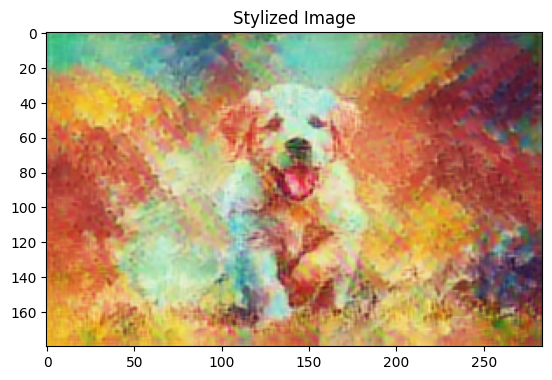

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, dtype=tf.float32)
    img = img[tf.newaxis,:]
    return img

def show_image(image):
    image = tf.squeeze(image, axis=0)
    plt.imshow(image)
    plt.title("Stylized Image")

content_image = load_image("/content/content.jpg")
style_image = load_image("/content/style.jpg")

hub_model = hub.load('https://tinyurl.com/tfhub')

styled_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]

show_image(styled_image)
plt.show()

## P7

In [ ]:
import numpy as np

# Generate dummy data for demonstration purposes (replace this with your actual data)
def generate_dummy_data(samples=100, features=10):
    data = np.random.rand(samples, features)
    labels = np.random.randint(0, 2, size=samples)
    return data, labels

# Define the AIRS algorithm (simplified)
class AIRS:
    def __init__(self, num_detectors=10, hypermutation_rate=0.1):
        self.num_detectors = num_detectors
        self.hypermutation_rate = hypermutation_rate

    def train(self, X, y):
        # Randomly select detectors from training data
        indices = np.random.choice(len(X), self.num_detectors, replace=False)
        self.detectors = X[indices]
        self.detector_labels = y[indices]

    def predict(self, X):
        predictions = []
        for sample in X:
            # Compute Euclidean distances to all detectors
            distances = np.linalg.norm(self.detectors - sample, axis=1)
            # Predict the label of the closest detector
            nearest_idx = np.argmin(distances)
            prediction = self.detector_labels[nearest_idx]
            predictions.append(prediction)
        return np.array(predictions)

# Generate dummy data
data, labels = generate_dummy_data()

# Split data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(data))
train_data, test_data = data[:split_index], data[split_index:]
train_labels, test_labels = labels[:split_index], labels[split_index:]

# Initialize and train AIRS
airs = AIRS(num_detectors=10, hypermutation_rate=0.1)
airs.train(train_data, train_labels)

# Test AIRS on the test set
predictions = airs.predict(test_data)

# Evaluate accuracy
accuracy = np.mean(predictions == test_labels)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.50


## P8

In [ ]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.0 MB/s eta 0:00:00


In [ ]:
import random
from deap import base, creator, tools, algorithms

# Define the evaluation function (minimize a simple mathematical function)
def eval_func(individual):
    for x in individual:
      x = x + x**2
    return x,
    # Minimize a quadratic function (x^2 + y^2 + z^2)
    #return sum(x ** 2 for x in individual),

# DEAP setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# Define attributes and individuals
toolbox.register("attr_float", random.uniform, -5.0, 5.0)  # Random float in range [-5, 5]
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Evaluation function and genetic operators
toolbox.register("evaluate", eval_func)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Create population
population = toolbox.population(n=50)

# Genetic Algorithm parameters
generations = 20

# Run the Genetic Algorithm
for gen in range(generations):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)

    fits = map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit

    population = toolbox.select(offspring, k=len(population))

# Get the best individual after all generations
best_ind = tools.selBest(population, k=1)[0]
best_fitness = best_ind.fitness.values[0]

print("Best individual:", best_ind)
print("Best fitness:", best_fitness)


Best individual: [-2.4785580476531144, 1.097232986605936, -0.5000000044206441]
Best fitness: -0.25


## P9

In [ ]:
import requests
from multiprocessing import Pool
from collections import defaultdict
import datetime

# Map Function: Fetches daily temperatures for a given year
def fetch_yearly_data(year):
    latitude = 18.5204   # Pune, India
    longitude = 73.8567
    start_date = f"{year}-01-01"
    end_date = f"{year}-12-31"
    url = (
        f"https://archive-api.open-meteo.com/v1/archive?"
        f"latitude={latitude}&longitude={longitude}"
        f"&start_date={start_date}&end_date={end_date}"
        f"&daily=temperature_2m_max,temperature_2m_min"
        f"&timezone=Asia%2FKolkata"
    )
    try:
        response = requests.get(url)
        data = response.json()
        temps = data['daily']
        max_temp = max(temps['temperature_2m_max'])
        min_temp = min(temps['temperature_2m_min'])
        return (year, min_temp, max_temp)
    except Exception as e:
        print(f"Error fetching data for {year}: {e}")
        return (year, None, None)

# Reduce Function: Determines the hottest and coolest years
def find_extremes(results):

    hottest = max(
        [r for r in results if r[2] is not None],
        key=lambda x: x[2]
    )
    coolest = min(
        [r for r in results if r[1] is not None],
        key=lambda x: x[1]
    )
    return hottest, coolest


if __name__ == "__main__":
    start_year = 2010
    end_year = 2015
    years = list(range(start_year, end_year + 1))

    with Pool() as pool:
        results = pool.map(fetch_yearly_data, years)
    print(results)

    hottest, coolest = find_extremes(results)

    print(f"Hottest Year: {hottest[0]} with max temp {hottest[2]}°C")
    print(f"Coolest Year: {coolest[0]} with min temp {coolest[1]}°C")


[(2010, 10.9, 42.0), (2011, 10.3, 39.4), (2012, 10.3, 39.0), (2013, 11.9, 41.2), (2014, 11.7, 39.7), (2015, 11.7, 39.8)]
Hottest Year: 2010 with max temp 42.0°C
Coolest Year: 2011 with min temp 10.3°C


## P10

In [ ]:
import numpy as np
import random

# Define the distance matrix (distances between cities)
distance_matrix = np.array([
    [0, 100, 150, 200],
    [10, 0, 350, 250],
    [150, 35, 0, 300],
    [100, 250, 30, 0]
])
num_ants = 10
num_iterations = 50
evaporation_rate = 0.5
pheromone_constant = 1.0
heuristic_constant = 1.0
num_cities = 4
pheromone = np.ones((num_cities, num_cities))

# Avoid division by zero for visibility matrix
visibility = np.zeros((num_cities, num_cities))
for i in range(num_cities):
    for j in range(num_cities):
        if i != j:
            visibility[i][j] = 1 / distance_matrix[i][j]

# ACO main loop
for iteration in range(num_iterations):
    ant_routes = []
    for ant in range(num_ants):
        current_city = random.randint(0, num_cities-1)
        visited_cities = [current_city]
        route = [current_city]

        while len(visited_cities) < num_cities:
            probabilities = []
            for city in range(num_cities):
                if city not in visited_cities:
                    pheromone_value = pheromone[current_city][city]
                    visibility_value = visibility[current_city][city]
                    probability = (pheromone_value ** pheromone_constant) * (visibility_value ** heuristic_constant)
                    probabilities.append((city, probability))

            # Choose the next city with highest probability (simplified)
            probabilities.sort(key=lambda x: x[1], reverse=True)
            selected_city = probabilities[0][0]
            route.append(selected_city)
            visited_cities.append(selected_city)
            current_city = selected_city

        ant_routes.append(route)


# Find best route
def route_distance(route):
    return sum(distance_matrix[route[i]][route[(i + 1) % num_cities]] for i in range(num_cities))

best_route = min(ant_routes, key=route_distance)
shortest_distance = route_distance(best_route)

print("Best route:", best_route)
print("Shortest distance:", shortest_distance)


Best route: [3, 2, 1, 0]
Shortest distance: 275


## CheatSheet:

# Extra: